In [1]:
# interaction with operation system
import os
import sys
# allow python to access the paths of our/other python scripts
sys.path.append('../python') # use this if you do not have torch installed
# sys.path.append('../../emg2pose/emg2pose/') # use this if you have torch installed

# data manipulation/visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# custom script
from data import *

### Loading the data

In [2]:
datadir = '../data/emg2pose_dataset_mini/' #stored in the data respository 
datalist = os.listdir(datadir) # list of datafiles in the directory

print('Working on dataset: ', datalist[0])
datah5 = Emg2PoseSessionData(os.path.join(datadir, datalist[0]))


Working on dataset:  2022-12-06-1670313600-e3096-cv-emg-pose-train@2-recording-13_right.hdf5


### Exploring the data

In [3]:
dir(Emg2PoseSessionData(os.path.join('../data/emg2pose_dataset_mini/', '2022-12-06-1670313600-e3096-cv-emg-pose-train@2-recording-13_right.hdf5')))

['DATASET_NAME',
 'EMG',
 'END_TIME',
 'HDF5_GROUP',
 'JOINT_ANGLES',
 'NUM_CHANNELS',
 'SAMPLE_RATE',
 'SESSION_NAME',
 'SIDE',
 'STAGE',
 'START_TIME',
 'TIMESERIES',
 'TIMESTAMPS',
 'USER',
 '__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_file',
 'fields',
 'hdf5_path',
 'metadata',
 'no_ik_failure',
 'session_name',
 'slice',
 'timeseries',
 'timestamps',
 'user']

In [4]:
dir(datah5)
# print(datah5.no_ik_failure)
# print(datah5.slice)

['DATASET_NAME',
 'EMG',
 'END_TIME',
 'HDF5_GROUP',
 'JOINT_ANGLES',
 'NUM_CHANNELS',
 'SAMPLE_RATE',
 'SESSION_NAME',
 'SIDE',
 'STAGE',
 'START_TIME',
 'TIMESERIES',
 'TIMESTAMPS',
 'USER',
 '__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_file',
 'fields',
 'hdf5_path',
 'metadata',
 'no_ik_failure',
 'session_name',
 'slice',
 'timeseries',
 'timestamps',
 'user']

In [5]:
metadata = datah5.metadata
print('Metadata: ')
for key, val in metadata.items():
    print('\t', key, ':', val)

Metadata: 
	 end : 1670314959.5166667
	 filename : 2022-12-06-1670313600-e3096-cv-emg-pose-train@2-recording-13_right
	 generalization : user
	 held_out_stage : False
	 held_out_user : True
	 moving_hand : both
	 num_channels : 16
	 sample_rate : 2000.0
	 session : 2022-12-06-1670313600-e3096-cv-emg-pose-train@2
	 side : right
	 split : val
	 stage : TwoHandedFreeStyle
	 start : 1670314722.55
	 user : d387095792


In [6]:
import pandas as pd

df = pd.read_csv(os.path.join(datadir, 'metadata.csv'))
print('total sessions: ', len(df))

print('\nParticipants: ', len(np.unique(df['user'])))

print('\nStages: ', len(np.unique(df['stage'])))
print(np.unique(df['stage']))


df.head(10)

total sessions:  25253

Participants:  193

Stages:  29
['AllFingerPinchesThumbSwipeThumbRotate' 'CoffeePanicPete'
 'CountingUpDownFaceSideAway' 'CountingUpDownFingerWigglingSpreading'
 'DoorknobFingerGraspFistGrab' 'FastPongFronthandBackhandThrowing'
 'FingerAbductionSeries' 'FingerFreeform'
 'FingerPinchesSingleFingerPinchesMultiple' 'FingerTouchPalmClapmrburns'
 'FingerWigglingSpreading' 'GraspPunchCloseFar' 'HandClawGraspFlicks'
 'HandDeskSeparateClaspedChest'
 'HandOverHandAllFingerPinchesThumbSwipeThumbRotate'
 'HandOverHandCountingUpDownFingerWigglingSpreading'
 'HookEmHornsOKScissors' 'IndexPinchesMiddlePinchesThumbswipes'
 'IndividualFingerPointingSnap' 'OneHandedFreeStyle' 'PlayBlocksChess'
 'PokeDrawPinchRotateclosefar' 'PokePinchCloseFar' 'ShakaVulcanPeace'
 'ThumbsSwipesWholeHand' 'ThumbsUpDownThumbRotationsCWCCWP'
 'TwoHandedFreeStyle' 'WristFlexionAbduction' 'unconstrained']


,session,user,stage,start,end,side,filename,moving_hand,held_out_user,held_out_stage,split,generalization
0,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,ThumbsUpDownThumbRotationsCWCCWP,1.649400e+09,1.649400e+09,left,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,False,val,user
1,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,ThumbsUpDownThumbRotationsCWCCWP,1.649400e+09,1.649400e+09,right,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,False,val,user
2,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,HandClawGraspFlicks,1.649401e+09,1.649401e+09,left,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,False,val,user
3,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,HandClawGraspFlicks,1.649401e+09,1.649401e+09,right,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,False,val,user
4,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,ShakaVulcanPeace,1.649401e+09,1.649401e+09,left,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,True,val,user_stage
5,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,ShakaVulcanPeace,1.649401e+09,1.649401e+09,right,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,True,val,user_stage
6,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,HookEmHornsOKScissors,1.649401e+09,1.649401e+09,left,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,True,val,user_stage
7,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,HookEmHornsOKScissors,1.649401e+09,1.649401e+09,right,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,True,val,user_stage
8,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,HookEmHornsOKScissors,1.649315e+09,1.649315e+09,left,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,True,val,user_stage
9,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,HookEmHornsOKScissors,1.649315e+09,1.649315e+09,right,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,True,val,user_stage


### Plotting the data

> This code uses the emg2pose programmatic interface (datah5 being an instance of Emg2PoseSessionData) to access the core recordings within a single HDF5 file.

Timestamp shape: (473792,)
EMG shape: (473792, 16)
Jointangle shape: (473792, 20)


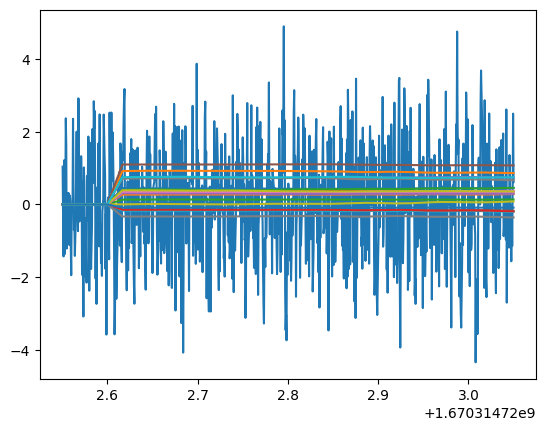

In [7]:
# Extract the time axis for the recording. This is a 1D vector of timestamps.
# In the 'emg2pose' dataset, all recordings (EMG and joint angles) are time-aligned
# and sampled at 2 kHz (2,000 samples per second).
timestmp = datah5.timeseries[datah5.TIMESTAMPS] # nsamples vector

# Extract the raw sEMG data.
# This data measures electrical signals generated by muscles.
# It is a 2D array where the first dimension is time samples (nsamples)
# and the second dimension is the 16 channels recorded by the sEMG wristband [1, 5].
emgdata =  datah5.timeseries[datah5.EMG] # 2darray nsamples x nchannels?

# Extract the ground-truth pose labels (kinematics).
# This data represents the movement and position of the hand, derived from a 26-camera
# motion capture rig and linearly interpolated to 2 kHz.
# It is a 2D array where rows are time samples and columns are the 20 joint angles
# (degrees of freedom) of the hand.
jointangle = datah5.timeseries[datah5.JOINT_ANGLES] # 2darray nsamples x njoints?

# Print the size of the arrays. Since the data is time-aligned, all arrays
# must have the same number of samples (the first dimension).
print('Timestamp shape:' ,timestmp.shape)
print('EMG shape:' , emgdata.shape)
print('Jointangle shape:', jointangle.shape)

# Plot the raw EMG data for the first 1,000 samples (0.5 seconds of data at 2kHz).
# This plots the time (X-axis) against the muscle signal intensity from the first
# EMG sensor channel (Channel 0) (Y-axis).
plt.plot(timestmp[:1000], emgdata[:1000,0])
plt.plot(timestmp[:1000], jointangle[:1000,:])
plt.show()


> This following code performs a frequency analysis (using the Fast Fourier Transform, or FFT) on one second of raw Surface Electromyography (sEMG) data. This type of analysis is essential for understanding the quality and characteristics of the muscle signals recorded. Recall: The emg2pose dataset uses 16-channel sEMG, which measures electrical potentials generated by muscles during movement.


Recording freq 2000 Hz


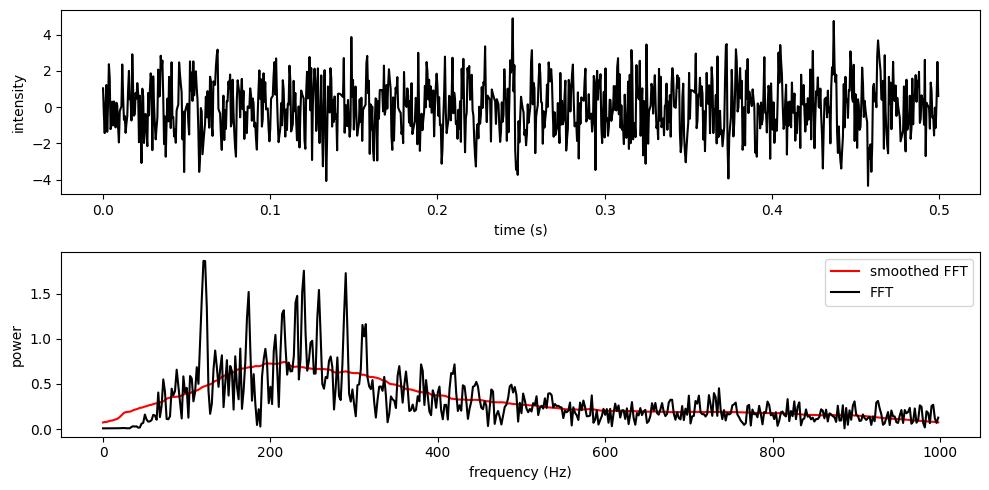

In [8]:
from scipy.fft import fft, fftfreq

# Set up frequency parameters

#deterime samplerate from timestamps
# Retrieve the sample rate (frequency at which data was collected) from the session metadata.
# In the emg2pose dataset, sEMG is recorded at 2 kHz (2000 samples per second).
samplerate = metadata['sample_rate']
print('Recording freq {} Hz'.format(int(samplerate)))

# N is set to half the sample rate (1000 if samplerate is 2000).
# This value is used below to define the frequency axis size (N/2 = 500 points).
N = int(samplerate/2) #Nyquist limit

# T is the time interval (period) between two consecutive samples.
# If samplerate is 2000 Hz, T = 1 / 2000 = 0.0005 seconds.
T = 1.0 / samplerate

# Create the time axis array for plotting the raw signal.
# Since N=1000 and T=0.0005, this array covers the first 0.5 seconds of the signal.
time = np.linspace(0.0, N*T, N, endpoint=False)

# Calculate the Fast Fourier Transform (FFT) 

# Calculate the FFT (which converts the signal from the time domain to the frequency domain).
# Analyze the first 'samplerate' samples (2000 samples) of the first EMG channel (index 0).
# Analyzing 2000 samples means we are looking at 1 second of recorded muscle activity (2000 samples / 2000 Hz).
yf = fft(emgdata[:int(samplerate),0]) # Fourier transform

# Calculate the frequencies corresponding to the FFT output.
# The frequency spectrum is symmetrical, so we only keep the first half (up to the Nyquist frequency, 1000 Hz).
# The array 'xf' will define the X-axis for the frequency plot (from 0 Hz up to 1000 Hz).
xf = fftfreq(N, T)[:N//2] # Frequencies of the transform

# Plotting time-domain signal (raw data)

# Create a figure with 2 subplots (one for time, one for frequency)
fig, axs = plt.subplots(2,1,figsize=(10,5))

# Plot the raw sEMG signal (intensity over time) for Channel 0
# Plot the first N=1000 samples (0.5 seconds)
axs[0].plot(time[:N], emgdata[:N,0], color='black') #data plot
axs[0].set_ylabel('intensity')
axs[0].set_xlabel('time (s)')

# Plot the frequency-domain signal (power spectrum)

# Calculate the single-sided magnitude spectrum (power) of the FFT result (yf).
# The expression (2.0/N * np.abs(yf[0:N//2])) normalizes the magnitude.
# Then, np.convolve applies a moving average (100 point window) to smooth out the noisy EMG frequency spectrum.
smoothy = np.convolve(2.0/N * np.abs(yf[0:N//2]), np.ones(100)/100, mode='same') # moving average of freq space

# Plot the smoothed power spectrum in red. Smoothing makes the key frequency bands easier to identify.
axs[1].plot(xf, smoothy, color='red', alpha=1, label = 'smoothed FFT') #data plot

# Plot the raw, unsmoothed power spectrum in black (often noisy, but shows all components).
axs[1].plot(xf, 2.0/N * np.abs(yf[0:N//2]), color='black', alpha=1, label = 'FFT') #data plot

axs[1].set_ylabel('power')
axs[1].set_xlabel('frequency (Hz)')
axs[1].legend()
plt.tight_layout()
plt.show()



> The following code is designed to visualize the raw sEMG signals from multiple channels over a set time period (10 seconds). It allows us to see the intensity and patterns of muscle activity across the sEMG-RD wristband's sensors. Recall: The emg2pose dataset contains 16-channel sEMG data sampled at 2 kHz.

236.896 sec of data
3.9482666666666666 min of data


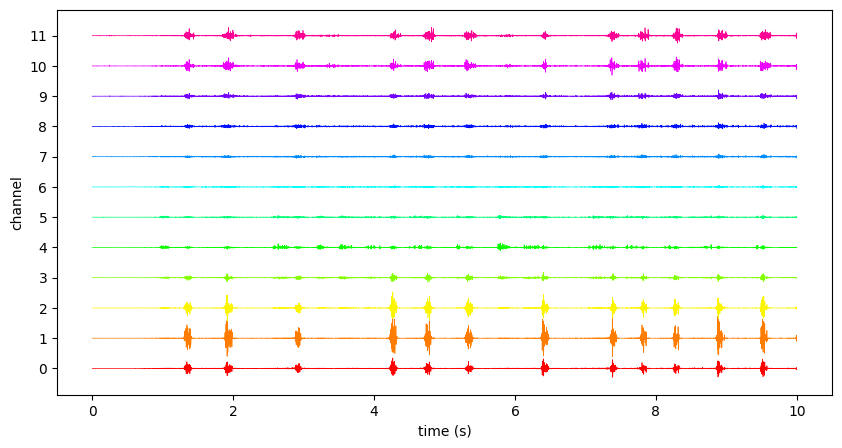

In [9]:
# Define the duration (length) of the recording segment to plot
# plot all channels for a length of data
length = 10 #seconds

# Print the total duration of the data currently loaded into the 'emgdata' variable
# emgdata.shape is the total number of samples (N_total)
# samplerate is 2000.0 Hz
print(emgdata.shape[0]/samplerate, 'sec of data')
print(emgdata.shape[0]/samplerate/60, 'min of data')

# Calculate the total number of data points (samples, N) needed to cover the defined 'length'
# N = Sample Rate (2000 Hz) * Length (10 seconds) = 20,000 samples
N = int(samplerate * length) #n values

# Calculate the time period (T) between consecutive samples
# T = 1 / 2000 Hz = 0.0005 seconds
T = 1.0 / samplerate

# Create the time axis array (X-axis for the plot)
# This array runs from 0.0 seconds up to 'length' seconds
time = np.linspace(0.0, N, N, endpoint=False) * T

import matplotlib as mpl
# Import a color map ('hsv' is used here) to ensure each plotted channel has a distinct color
cmap = mpl.colormaps['hsv']

fig = plt.figure(figsize=(10,5))

# Loop through the first 12 sEMG channels (total 16 channels)
# Note: The code plots the first 12 channels (i=0 to i=11)
for i in range(12):
    plt.plot(time, emgdata[:N,i] + i*2000, linewidth=0.5, color=cmap(i/12))
plt.yticks(2000*np.arange(12), np.arange(12))
plt.ylabel('channel')
plt.xlabel('time (s)')
plt.show()

> Below: for understanding the quality of the hand pose data within the emg2pose benchmark, specifically identifying when the recorded joint angles are likely valid and plotting the movement of all 20 joint angles over time. Concept addressed here is the Inverse Kinematics (IK) failure mask, which flags unreliable pose estimates caused by occluded motion capture markers. Frames where the IK solver failed constitute 12.7% of the total dataset.


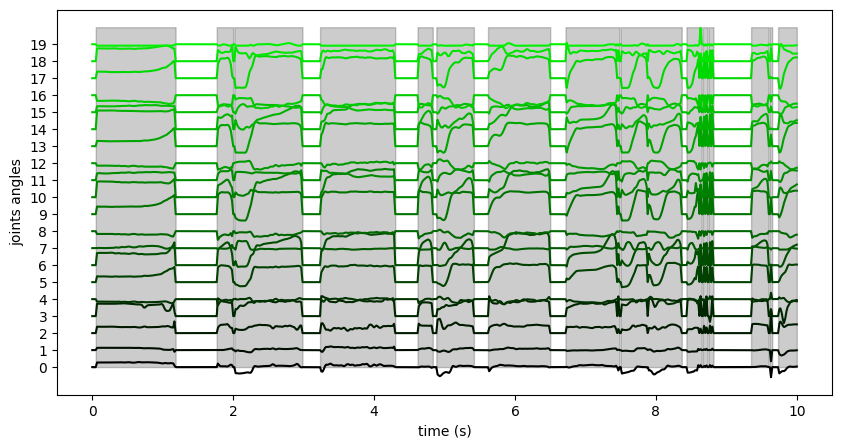

In [10]:
# This function is used to identify continuous blocks of 'True' values in a binary vector.
# Find when the hand is moving
# TAKEN FROM emg2pose utils
def get_contiguous_ones(binary_vector: np.ndarray) -> list[tuple[int, int]]:
    """Get a list of (start_idx, end_idx) for each contiguous block of True values."""
    if (binary_vector == 0).all():
        return []

    # Find the indices where the vector is True (ones)
    ones = np.where(binary_vector)[0]

    # Identify where the sequence of True values breaks (boundaries)
    boundaries = np.where(np.diff(ones) != 1)[0]

    # Construct the start and end indices for each continuous block of True values
    return [
        (ones[i], ones[j])
        for i, j in zip(
            np.insert(boundaries + 1, 0, 0), np.append(boundaries, len(ones) - 1)
        )
    ]
    
# This function creates a mask to identify reliable joint angle data
def get_ik_failures_mask(joint_angles: np.ndarray) -> np.ndarray:
    """Compute mask that is True where there are no ik failures."""

    # Create an array of zeros with the same shape as the joint angles
    zeros = np.zeros_like(joint_angles)  # (..., joint)

    # Check which joint angle values are close to zero (often the result of an IK failure)
    is_zero = np.isclose(joint_angles, zeros)

    # Return a mask (1D boolean vector) that is True only when NOT ALL 20 joints are zero along the time axis (axis=-1)
    # This True value means: 'No Inverse Kinematics failure occurred at this time step.'
    return ~np.all(is_zero, axis=-1)

# Apply the mask function to the full joint angle data (nsamples x 20 joints)
# 'angle_mask' is a 1D boolean array (nsamples,) indicating valid pose data
angle_mask = get_ik_failures_mask(jointangle)

# Calculate the instantaneous change (velocity) for all 20 joint angles.
# This array represents the speed of movement. While not used for plotting here,
# calculating angular velocity is a common step in sEMG modeling (e.g., the vemg2pose model predicts angular velocities)
change_in_angle = np.diff(jointangle, axis=0)

fig = plt.figure(figsize=(10,5))
for i in range(20):
    # Plot the joint angle data for the first N samples (e.g., 10 seconds).
    # '+ i' vertically offsets each of the 20 joint angle lines so they are stacked
    # and readable on the same plot, even though they share the same time axis.
    # The color uses the channel index 'i' to create a gradient.
    plt.plot(time, jointangle[:N,i] + i, color=(0,i/20,0))

# Highlight the time periods where the hand pose data is reliable.
# plt.fill_between creates a shaded area.
# angle_mask[:N]*20 defines the top boundary of the shaded area. Multiplying by 20
# ensures the shaded area spans the vertical space of all 20 stacked joint angle plots.
# The area is filled in black ('k') with some transparency (alpha=0.2), representing
# the valid movement windows.
plt.fill_between(time, angle_mask[:N]*20, np.zeros(N), color='k', alpha=0.2, zorder=0)  

plt.yticks(np.arange(20), np.arange(20))
plt.ylabel('joints angles')
plt.xlabel('time (s)')
plt.show()




> Below: builds directly upon the previous plotting examples by combining the raw sEMG signals (muscle activity) with the pose quality mask (angle_mask) to visually show when the hand is actively moving and when that movement data is considered reliable. 

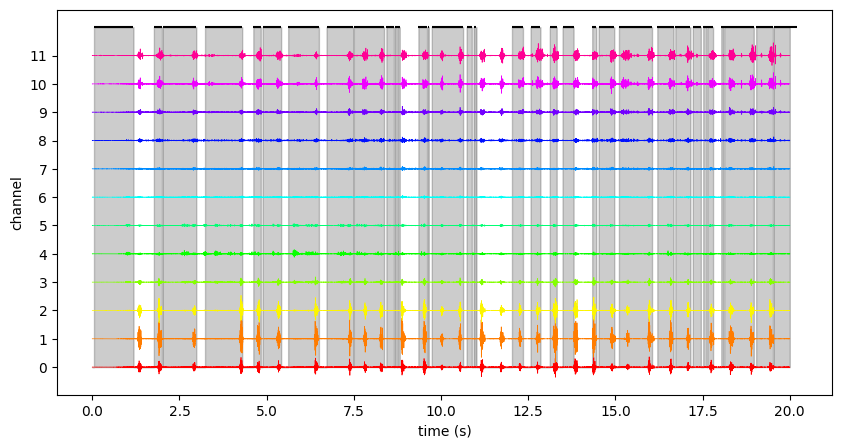

In [11]:
# Plot when hand is moving, and what the sensor detects
# This section visualizes the raw EMG signal alongside the "no IK failure" mask,
# showing where movement is occurring and where the ground-truth pose data is reliable.

# Define the length of the recording segment we want to plot (20 seconds).
length = 20 #seconds

# Calculate the total number of samples (N) needed for this duration.
# Since the sample rate ('samplerate') is 2000 Hz, N = 2000 * 20 = 40,000 samples
N = int(samplerate * length) #n values

# Calculate the time interval (T) between samples (1/2000 seconds)
T = 1.0 / samplerate

# Create the time axis array (X-axis) for the 20-second plot
time = np.linspace(0.0, N, N, endpoint=False) * T

# The 'angle_mask' (computed earlier using get_ik_failures_mask) is a 1D boolean
# array indicating 'True' where the joint angle data is reliable (no IK failure).
# 'windows' identifies the start and end indices for all continuous blocks of valid data.
windows = get_contiguous_ones(angle_mask)

import matplotlib as mpl
cmap = mpl.colormaps['hsv']

fig = plt.figure(figsize=(10,5))
for i in range(12):
    plt.plot(time, emgdata[:N,i] + i*2000, linewidth=0.5, color=cmap(i/12), zorder=10) 

# Highlight the valid movement periods using the angle mask.
# plt.fill_between creates a shaded area:
# - The top boundary (Y-max) is angle_mask[:N] * 12 * 2000. 
#   The height (12 * 2000) spans the vertical range of all 12 stacked EMG channels.
# - The bottom boundary (Y-min) is np.zeros(N).
# - This shaded area (color='k', alpha=0.2) marks time segments where the ground-truth
#   pose (joint angle) estimates are reliable (i.e., the Inverse Kinematics solver did not fail)
plt.fill_between(time, angle_mask[:N]*12*2000, np.zeros(N), color='k', alpha=0.2, zorder=0)  

# Add horizontal lines to denote the duration of the contiguous valid movement windows
for window in windows:
    if window[0]<N:
        plt.hlines(12*2000, window[0]/samplerate, window[1]/samplerate, color='k')    

plt.yticks(2000*np.arange(12), np.arange(12))
plt.ylabel('channel')
plt.xlabel('time (s)')
plt.show()



### Zoom in on a couple events

Location of first event:  1.31


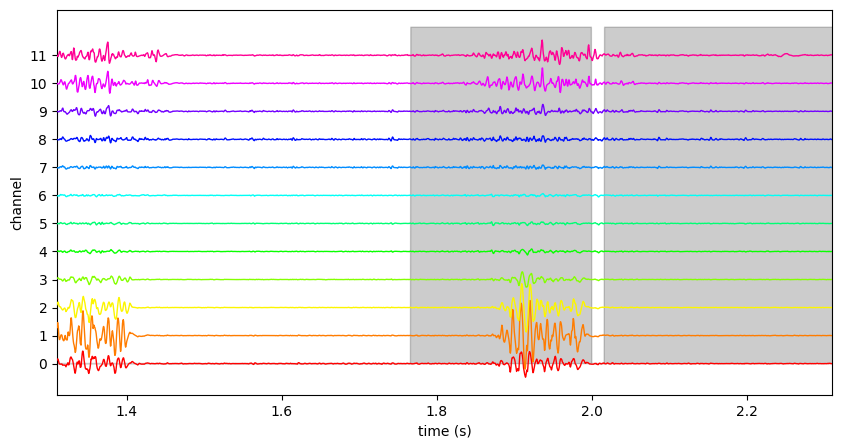

In [12]:
# Find the location of the 'first event' by looking for a high sum of muscle activity
# across all channels (a proxy for significant movement/muscle contraction).
# np.sum(emgdata[:N,:], axis=1)>500 checks if the total signal intensity at any time sample
# exceeds a threshold (500).  selects the time index of the first occurrence.
firstone = np.where(np.sum(emgdata[:N,:], axis=1)>500)[0][0]
print('Location of first event: ', firstone/samplerate)

# Define the zoomed-in window length (2000 samples = 1 second of data at 2kHz)
window = firstone + 2000

fig = plt.figure(figsize=(10,5))

# Plot the 12 channels, but apply a smaller vertical offset ('+ i*1000') 
# to make the signals appear closer together for the zoomed view
for i in range(12):
    plt.plot(time[firstone:window], emgdata[firstone:window,i] + i*1000, 
             linewidth=1, color=cmap(i/12), zorder=10) 

# Shade the background based on the angle mask validity for this zoomed window
plt.fill_between(time, angle_mask[:N]*12*1000, np.zeros(N), color='k', alpha=0.2, zorder=0)  

# Limit the X-axis (time) display to the zoomed window (1 second around the event).
plt.xlim(firstone/samplerate, window/samplerate)

plt.yticks(1000*np.arange(12), np.arange(12))
plt.ylabel('channel')
plt.xlabel('time (s)')
plt.show()


## HDF5 to EDA

### (Test) For first 1000 samples

In [13]:
# To test, only the first 1000 samples per file are included in the final DataFrame

import os
import h5py
import numpy as np
import pandas as pd

# Add tqdm for progress bar
from tqdm import tqdm

# --- CONFIGURATION ---
# Set the directory where EMG HDF5 files and metadata are stored
datadir = '../data/emg2pose_dataset_mini/'

# Set the path to the metadata CSV file (contains info about each recording)
metadata_path = os.path.join(datadir, 'metadata.csv')

# --- LOAD METADATA ---
# Read the metadata CSV into a pandas DataFrame
# Each row in this DataFrame describes one recording (e.g., user, session, stage, etc.)
metadata_df = pd.read_csv(metadata_path)

# Store the column names of the metadata for later use (to keep column order consistent)
meta_cols = metadata_df.columns

# --- FILE COLLECTION ---
# Create a list of all HDF5 files in the data directory
# Each file contains the raw EMG and joint angle data for one recording
datalist = [
    os.path.join(datadir, f)
    for f in os.listdir(datadir)
    if f.endswith('.hdf5')
]

# --- IK FAILURE MASK FUNCTION ---
def get_ik_failures_mask(joint_angles: np.ndarray) -> np.ndarray:
    """
    Compute mask that is True where there are no ik failures.
    I.e., compute a boolean mask indicating which time points have valid joint angles.
    Returns True where the joint angles are NOT all zero (i.e., no IK failure).
    - joint_angles: shape (N, 20), where N is the number of time samples.
    """
    zeros = np.zeros_like(joint_angles)       # Create an array of zeros with the same shape
    is_zero = np.isclose(joint_angles, zeros) # Check where joint_angles are (almost) zero
    # For each time sample, check if ALL joint angles are zero (axis=-1)
    # ~np.all(...) inverts the result: True means "not all zero" (i.e., valid)
    return ~np.all(is_zero, axis=-1)

# --- MAIN LOOP: BUILD EDA DATAFRAME ---
# This list will store a DataFrame for each file, to be combined later
all_rows = []

# Loop over every HDF5 file in the dataset
# tqdm adds a progress bar to the loop
for filepath in tqdm(datalist, desc="Processing HDF5 files"):
    # Get the filename (e.g., '2022-12-06-...-right.hdf5')
    fname = os.path.basename(filepath)

    # Remove the '.hdf5' extension for matching with metadata
    fname_no_ext = os.path.splitext(fname)[0]
    
    # Find the row in the metadata DataFrame that matches this file
    # (Assumes the 'filename' column in metadata does NOT have '.hdf5')
    meta_row = metadata_df[metadata_df['filename'].str.replace('.hdf5', '') == fname_no_ext]

    # If no metadata is found for this file, print a warning and skip it
    if meta_row.empty:
        print(f"Warning: No metadata found for {fname}")
        continue

    # Get the first (and should be only) matching row as a pandas Series
    meta_row = meta_row.iloc[0]

    # Open the HDF5 file for reading
    with h5py.File(filepath, 'r') as f:

        # Access the 'emg2pose' group inside the file
        g = f['emg2pose']

        # Read the 'timeseries' dataset as a structured numpy array
        ts_data = np.array(g['timeseries'])
        N = min(1000, ts_data.shape[0])  # For EDA, limit to first 1000 samples

        # Extract the EMG data (shape: N x 16)
        emg = ts_data['emg'][:N]  

        # Extract the joint angle data (shape: N x 20)
        joint_angles = ts_data['joint_angles'][:N]  

        # Extract the timestamps (shape: N,)
        timestamps = ts_data['time'][:N]  

        # Compute the IK failure mask (True = valid, False = IK failure)
        no_ik_failure = get_ik_failures_mask(joint_angles)

        # Build a DataFrame for these samples
        # - Each row is a time sample
        # - Metadata columns are repeated for every row
        # - EMG and joint angle columns are filled from the arrays
        # - 'timestamp' and 'no_ik_failure' columns are added for each sample
        df = pd.DataFrame({
            # Repeat each metadata value N times (one for each time sample)
            **{col: [meta_row[col]] * N for col in meta_cols}, 
            # Add each EMG channel as its own column, with two-digit suffix (e.g., emg_ch00, emg_ch01, ...)
            **{f'emg_ch{i:02d}': emg[:, i] for i in range(emg.shape[1])},
            # Add each joint angle as its own column, with two-digit suffix (e.g., joint_angle_00, joint_angle_01, ...)
            **{f'joint_angle_{j:02d}': joint_angles[:, j] for j in range(joint_angles.shape[1])},
            # Add the timestamp for each sample
            'timestamp': timestamps,
            # Add the IK failure mask for each sample
            'no_ik_failure': no_ik_failure
        })
        # Add this DataFrame to the list
        all_rows.append(df)

# After processing all files, concatenate all DataFrames into one big DataFrame
# This gives us a single table with all samples from all recordings
eda_df = pd.concat(all_rows, ignore_index=True)

# --- COLUMN REORDERING LOGIC ---
# Ensure the first columns are the metadata columns, in the correct order,
# then 'no_ik_failure', then 'timestamp', then all emg/joint_angle columns, then any others.

# Convert meta_cols to a list if it's not already
meta_cols = list(meta_cols)

# Find the index of the last metadata column ("generalization")
last_meta_idx = meta_cols.index('generalization')

# Build the new column order:
# 1. All metadata columns (in order)
# 2. 'no_ik_failure'
# 3. 'timestamp'
# 4. All columns starting with 'emg_ch' (in order)
# 5. All columns starting with 'joint_angle_' (in order)
# 6. Any other columns (if present)
emg_cols = [col for col in eda_df.columns if col.startswith('emg_ch')]
joint_angle_cols = [col for col in eda_df.columns if col.startswith('joint_angle_')]
other_cols = [col for col in eda_df.columns if col not in meta_cols + ['no_ik_failure', 'timestamp'] + emg_cols + joint_angle_cols]

# Final column order
final_col_order = (
    list(meta_cols) +
    ['no_ik_failure', 'timestamp'] +
    emg_cols +
    joint_angle_cols +
    other_cols
)

# Reorder the DataFrame columns
eda_df = eda_df[final_col_order]

# Show the shape and first few rows of the final DataFrame (for inspection)
print(eda_df.shape)
eda_df.head()

# Optionally, save to CSV for further analysis
eda_df.to_csv('emg2pose_eda_aligned_1000.csv', index=False)

Processing HDF5 files: 100%|████████████████████| 30/30 [00:00<00:00, 42.19it/s]


(30000, 50)


### For all available HDF5 files

In [14]:
import os
import h5py
import numpy as np
import pandas as pd

# Add tqdm for progress bar
from tqdm import tqdm

# --- CONFIGURATION ---
# Set the directory where EMG HDF5 files and metadata are stored
datadir = '../data/emg2pose_dataset_mini/'

# Set the path to the metadata CSV file (contains info about each recording)
metadata_path = os.path.join(datadir, 'metadata.csv')

# --- LOAD METADATA ---
# Read the metadata CSV into a pandas DataFrame
# Each row in this DataFrame describes one recording (e.g., user, session, stage, etc.)
metadata_df = pd.read_csv(metadata_path)

# Store the column names of the metadata for later use (to keep column order consistent)
meta_cols = metadata_df.columns

# --- FILE COLLECTION ---
# Create a list of all HDF5 files in the data directory
# Each file contains the raw EMG and joint angle data for one recording
datalist = [
    os.path.join(datadir, f)
    for f in os.listdir(datadir)
    if f.endswith('.hdf5')
]

# --- IK FAILURE MASK FUNCTION ---
def get_ik_failures_mask(joint_angles: np.ndarray) -> np.ndarray:
    """
    Compute mask that is True where there are no ik failures.
    I.e., compute a boolean mask indicating which time points have valid joint angles.
    Returns True where the joint angles are NOT all zero (i.e., no IK failure).
    - joint_angles: shape (N, 20), where N is the number of time samples.
    """
    zeros = np.zeros_like(joint_angles)       # Create an array of zeros with the same shape
    is_zero = np.isclose(joint_angles, zeros) # Check where joint_angles are (almost) zero
    # For each time sample, check if ALL joint angles are zero (axis=-1)
    # ~np.all(...) inverts the result: True means "not all zero" (i.e., valid)
    return ~np.all(is_zero, axis=-1)

# --- MAIN LOOP: BUILD EDA DATAFRAME ---
# This list will store a DataFrame for each file, to be combined later
all_rows = []

# Loop over every HDF5 file in the dataset
# tqdm adds a progress bar to the loop
for filepath in tqdm(datalist, desc="Processing HDF5 files"):
    # Get the filename (e.g., '2022-12-06-...-right.hdf5')
    fname = os.path.basename(filepath)

    # Remove the '.hdf5' extension for matching with metadata
    fname_no_ext = os.path.splitext(fname)[0]
    
    # Find the row in the metadata DataFrame that matches this file
    # (Assumes the 'filename' column in metadata does NOT have '.hdf5')
    meta_row = metadata_df[metadata_df['filename'].str.replace('.hdf5', '') == fname_no_ext]

    # If no metadata is found for this file, print a warning and skip it
    if meta_row.empty:
        print(f"Warning: No metadata found for {fname}")
        continue

    # Get the first (and should be only) matching row as a pandas Series
    meta_row = meta_row.iloc[0]

    # Open the HDF5 file for reading
    with h5py.File(filepath, 'r') as f:

        # Access the 'emg2pose' group inside the file
        g = f['emg2pose']

        # Read the 'timeseries' dataset as a structured numpy array
        ts_data = np.array(g['timeseries'])
        N = ts_data.shape[0]  # Number of time samples in this recording

        # Extract the EMG data (shape: N x 16)
        emg = ts_data['emg']  

        # Extract the joint angle data (shape: N x 20)
        joint_angles = ts_data['joint_angles']  

        # Extract the timestamps (shape: N,)
        timestamps = ts_data['time']  

        # Compute the IK failure mask (True = valid, False = IK failure)
        no_ik_failure = get_ik_failures_mask(joint_angles)

        # Build a DataFrame for this recording
        # - Each row is a time sample
        # - Metadata columns are repeated for every row
        # - EMG and joint angle columns are filled from the arrays
        # - 'timestamp' and 'no_ik_failure' columns are added for each sample
        df = pd.DataFrame({
            # Repeat each metadata value N times (one for each time sample)
            **{col: [meta_row[col]] * N for col in meta_cols}, 
            # Add each EMG channel as its own column, with two-digit suffix (e.g., emg_ch00, emg_ch01, ...)
            **{f'emg_ch{i:02d}': emg[:, i] for i in range(emg.shape[1])},
            # Add each joint angle as its own column, with two-digit suffix (e.g., joint_angle_00, joint_angle_01, ...)
            **{f'joint_angle_{j:02d}': joint_angles[:, j] for j in range(joint_angles.shape[1])},
            # Add the timestamp for each sample
            'timestamp': timestamps,
            # Add the IK failure mask for each sample
            'no_ik_failure': no_ik_failure
        })
        # Add this DataFrame to the list
        all_rows.append(df)

# After processing all files, concatenate all DataFrames into one big DataFrame
# This gives us a single table with all samples from all recordings
eda_df = pd.concat(all_rows, ignore_index=True)

# --- COLUMN REORDERING LOGIC ---
# Ensure the first columns are the metadata columns, in the correct order,
# then 'no_ik_failure', then 'timestamp', then all emg/joint_angle columns, then any others.

# Convert meta_cols to a list if it's not already
meta_cols = list(meta_cols)

# Find the index of the last metadata column ("generalization")
last_meta_idx = meta_cols.index('generalization')

# Build the new column order:
# 1. All metadata columns (in order)
# 2. 'no_ik_failure'
# 3. 'timestamp'
# 4. All columns starting with 'emg_ch' (in order)
# 5. All columns starting with 'joint_angle_' (in order)
# 6. Any other columns (if present)
emg_cols = [col for col in eda_df.columns if col.startswith('emg_ch')]
joint_angle_cols = [col for col in eda_df.columns if col.startswith('joint_angle_')]
other_cols = [col for col in eda_df.columns if col not in meta_cols + ['no_ik_failure', 'timestamp'] + emg_cols + joint_angle_cols]

# Final column order
final_col_order = (
    list(meta_cols) +
    ['no_ik_failure', 'timestamp'] +
    emg_cols +
    joint_angle_cols +
    other_cols
)

# Reorder the DataFrame columns
eda_df = eda_df[final_col_order]

# Show the shape and first few rows of the final DataFrame (for inspection)
print(eda_df.shape)
eda_df.head()

# Optionally, save to CSV for further analysis
# eda_df.to_csv('emg2pose_eda_aligned.csv', index=False)

Processing HDF5 files: 100%|████████████████████| 30/30 [00:05<00:00,  5.63it/s]


(4218756, 50)


,session,user,stage,start,end,side,filename,moving_hand,held_out_user,held_out_stage,...,joint_angle_10,joint_angle_11,joint_angle_12,joint_angle_13,joint_angle_14,joint_angle_15,joint_angle_16,joint_angle_17,joint_angle_18,joint_angle_19
0,2022-12-06-1670313600-e3096-cv-emg-pose-train@2,d387095792,TwoHandedFreeStyle,1.670315e+09,1.670315e+09,right,2022-12-06-1670313600-e3096-cv-emg-pose-train@...,both,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-12-06-1670313600-e3096-cv-emg-pose-train@2,d387095792,TwoHandedFreeStyle,1.670315e+09,1.670315e+09,right,2022-12-06-1670313600-e3096-cv-emg-pose-train@...,both,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-12-06-1670313600-e3096-cv-emg-pose-train@2,d387095792,TwoHandedFreeStyle,1.670315e+09,1.670315e+09,right,2022-12-06-1670313600-e3096-cv-emg-pose-train@...,both,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-12-06-1670313600-e3096-cv-emg-pose-train@2,d387095792,TwoHandedFreeStyle,1.670315e+09,1.670315e+09,right,2022-12-06-1670313600-e3096-cv-emg-pose-train@...,both,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-12-06-1670313600-e3096-cv-emg-pose-train@2,d387095792,TwoHandedFreeStyle,1.670315e+09,1.670315e+09,right,2022-12-06-1670313600-e3096-cv-emg-pose-train@...,both,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
